Prelimary:
    
```
conda install scipy
conda install matplotlib
```

Then restart jupyter notebook

# Correlation

Is there correlation between feature X and feature Y?

Note: The example below is for demonstrating the use of python/pandas for analysis using simple statistics methods; please refer to statistics texts for theory and method details.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/federer.csv')
df.shape

(1179, 70)

In [3]:
np   = df['player1 total points total']
pts  = df['player1 total points won'] / np
aces = df['player1 aces'] / np

Reminder: `pts` and `aces` are the results of element-wise divisions, i.e.

In [4]:
np[0:2]

0    103.0
1    106.0
Name: player1 total points total, dtype: float64

In [5]:
pts[0:2]

0    0.398058
1    0.613208
dtype: float64

In [6]:
pts[0:2] / np[0:2]

0    0.003865
1    0.005785
dtype: float64

In [7]:
pts[0]/np[0], pts[1]/np[1]

(0.0038646432274483927, 0.0057849768600925595)

Create a new data frame for analysis

In [8]:
df2 = pd.DataFrame({'points': pts, 'aces': aces})
df2 = df2.dropna()                                 # remove the NaNs
df2.shape

(1027, 2)

Visualize the data

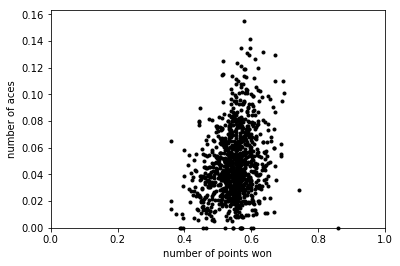

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(df2['points'], df2['aces'], 'k.', clip_on=False)
plt.xlim([0,1])
plt.ylim(0)
plt.xlabel('number of points won')
plt.ylabel('number of aces')

`.corr()`: Compute the correlations between columns

In [10]:
df2.corr()

,aces,points
aces,1.000000,0.255457
points,0.255457,1.000000


Create new columns of the "binarized" data

```
1 (True)  : if the value > median
0 (False) : otherwise
```

In [11]:
df2['X'] = df2['points'] > df2['points'].median()
df2['Y'] = df2['aces'  ] > df2['aces'  ].median()

In [12]:
df2['X'].head(3) 

0    False
1     True
2    False
Name: X, dtype: bool

Contigency table

In [13]:
t = pd.crosstab(df2['X'], df2['Y']) # compute the frequency
t

Y,False,True
X,,
False,300,214
True,214,299


chi-squared test

In [14]:
import scipy.stats as st

In [15]:
chi2, p, dof, expected = st.chi2_contingency(t)
p

1.3384233799633629e-07

The p value is very small --> there is statistically significant correlation between X and Y